# **1. 결정트리**



*   (1)~(5) sklearn 패키지의 wine 데이터셋 이용



(1) 데이터 로딩후  graphviz 패키지를 활용하여 결정 트리 모델 시각화
- 테스트 사이즈는 0.2
- 결과를 tree.dot 파일로 저장
- DecisionTreeClassifier(random_state=156)
- train_test_split(random_state=11)

In [1]:
#필요한 라이브러리 임포트 - 실행해주세요!
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import graphviz
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
## 1-a. 데이터로드
wine_data = load_wine()
## 1-b. 데이터 분할
## 답안 ##
X_train, X_test, y_train, y_test = train_test_split(
    wine_data.data, wine_data.target, test_size=0.2, random_state=11)


In [3]:
## 1-c. 모델 학습
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [4]:
## 1-d. 시각화 - graphviz패키
export_graphviz(dt_clf,
                out_file = "tree.dot",
                class_names=wine_data.target_names,
                feature_names=wine_data.feature_names,
                impurity=True,
                filled= True
                )

(2) 위의 결정 트리 모델에서 피처의 중요도 표현하고, 이를 seaborn 그래프를 활용하여 시각화하기


*   피처 중요도는 소수점 3의 자리까지 표현


출력 예시)
```  
Feature importances:  
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]  
alcohol : 0.019  
malic_acid : 0.000  
ash : 0.000  
alcalinity_of_ash : 0.000
...
```

In [5]:
# 2-1.feature importances - 예시 답안대로 print
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_), 3))

for name, value in zip(wine_data.feature_names, dt_clf.feature_importances_):
  print("{0} : {1:.3f}".format(name, value))


Feature importances:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
alcohol : 0.019
malic_acid : 0.000
ash : 0.000
alcalinity_of_ash : 0.000
magnesium : 0.000
total_phenols : 0.000
flavanoids : 0.416
nonflavanoid_phenols : 0.000
proanthocyanins : 0.000
color_intensity : 0.417
hue : 0.000
od280/od315_of_diluted_wines : 0.000
proline : 0.148


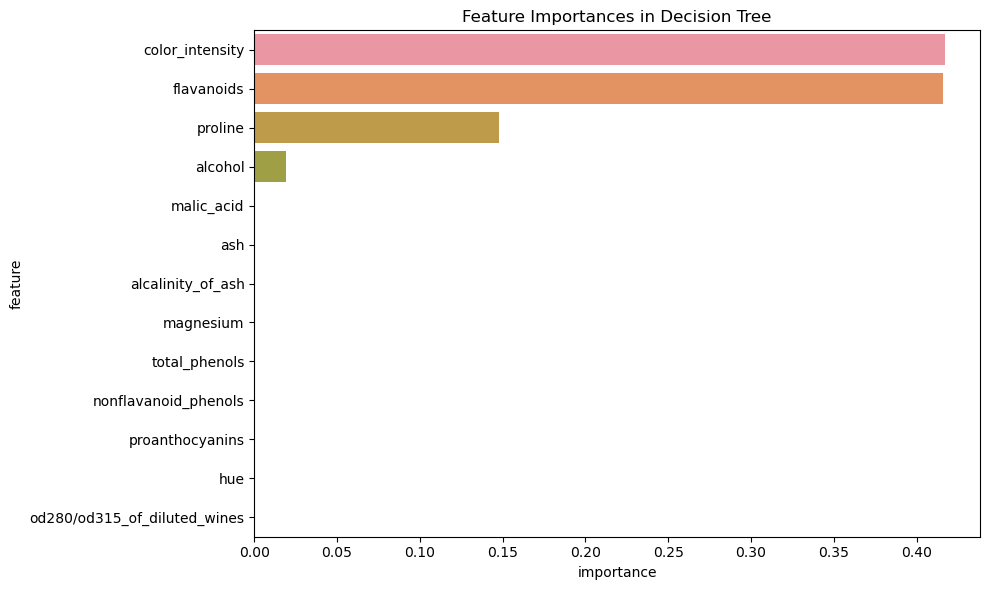

In [6]:
# 2-2.seaborn을 이용해 시각화
import matplotlib.pyplot as plt
import seaborn as sns

feature_importance_df = pd.DataFrame({
    'feature': wine_data.feature_names,
    'importance': dt_clf.feature_importances_
})

feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Feature Importances in Decision Tree')
plt.tight_layout()
plt.show()

(3) 최적의 하이퍼 파라미터와 최고 평균 정확도 수치 출력하기

* params = {
    'max_depth' : [2, 3, 4, 5],
    'min_samples_split' : [4, 8]
    }  
* 최고 평균 정확도 수치는 소수점 4자리까지 표현

* 교차 검증은 5회  




In [7]:
# 3-1. parmas 정의
params = {
    'max_depth': [2, 3, 4, 5],
    'min_samples_split': [4, 8]
}

# 3-2. GridSearchCV 객체 생성
grid_cv = GridSearchCV(dt_clf, param_grid=params, cv=5, scoring='accuracy')

# 3-3. 모델 학습
grid_cv.fit(X_train, y_train)

# 3-4. 최고 평균 정확도 출력
print("최적 하이퍼파라미터:", grid_cv.best_params_)
print("최고 평균 정확도: {0:.4f}".format(grid_cv.best_score_))

최적 하이퍼파라미터: {'max_depth': 3, 'min_samples_split': 4}
최고 평균 정확도: 0.9155


(4) for 반복문을 사용하여 depth 값에 따른 정확도 수치 출력하기  
* depths = [2, 3, 4, 5]
* 정확도 수치는 소수점 4자리까지
* random_state=16

In [8]:
depths = [2, 3, 4, 5]

# 각 max_depth 값에 대해 반복
for d in depths:
    # 결정트리 분류기 생성
    dt_clf = DecisionTreeClassifier(max_depth=d, random_state=16)

    # 모델 학습
    dt_clf.fit(X_train, y_train)

    # 테스트 데이터로 예측
    pred = dt_clf.predict(X_test)

    # 정확도 계산
    accuracy = accuracy_score(y_test, pred)

    print("max_depth= {0}, 정확도={1:.4f}".format(d, accuracy))


max_depth= 2, 정확도=0.8889
max_depth= 3, 정확도=0.9722
max_depth= 4, 정확도=0.9722
max_depth= 5, 정확도=0.9722


(5) 최적화된 모델로 테스트 데이터 예측 수행(결정 트리 예측 정확도를 구할 것)


*   (3)번 내용 활용
* 정확도는 소수점 4자리까지 표현



In [10]:
# GridSearchCV에서 찾은 최적의 하이퍼파라미터로 학습된 최적 모델 추출
best_df_clf = grid_cv.best_estimator_

# 최적 모델로 테스트 데이터 예측
pred1 = best_df_clf.predict(X_test)

# 예측값과 실제값을 비교하여 정확도 계산
accuracy = accuracy_score(y_test, pred1)

print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

결정 트리 예측 정확도: 0.9722


(6) 중복된 피처명 바꾸기

* 중복된 피처명 _1 _2로 변경   
ex) ["A", "A", "A"] -> ["A", "A_1", "A_2"]
* 출력예시
```
  column_name new_name
0       feat1    feat1
1       feat2    feat2
2       feat1  feat1_1
3       feat3    feat3
4       feat2  feat2_1
5       feat4    feat4
```

In [11]:
# 실행해주세요!

df = pd.DataFrame({
    "column_name": ["feat1", "feat2", "feat1",
                    "feat3", "feat2", "feat4"]
})


In [12]:
# cumcount()를 활용해 각 column_name 별로 중복 횟수 카운트하여 새로 생성한 'cumcnt' 칼럼에 저장 (0부터 시작)
df["cumcnt"] = df.groupby("column_name").cumcount()

# 중복된 경우만 뒤에 _숫자를 붙여서 새로운 이름 생성
df["new_name"] = df.apply(
    lambda x: f"{x['column_name']}" if x["cumcnt"] == 0 
              else f"{x['column_name']}_{x['cumcnt']}",
    axis= 1
)
# 확인
print(df[["column_name", "new_name"]])

  column_name new_name
0       feat1    feat1
1       feat2    feat2
2       feat1  feat1_1
3       feat3    feat3
4       feat2  feat2_1
5       feat4    feat4


# **2. 앙상블**

1. 사이킷런의 load_digits 데이터를 사용하여 훈련 세트(80%)와 테스트 세트(20%)로 나누시오.


In [13]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


# 문제 1: 데이터 로드 및 분할
digits = load_digits()


X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size=0.2, random_state=42, stratify=digits.target
)

print("훈련 세트 크기:", X_train.shape)
print("테스트 세트 크기:", X_test.shape)

훈련 세트 크기: (1437, 64)
테스트 세트 크기: (360, 64)


2. LogisticRegression과 KNeighborsClassifier를 기반으로 **보팅 분류기(VotingClassifier, soft voting)**를 만들어 훈련 후 테스트 세트 정확도를 출력하시오.


In [16]:
# 문제 2: 보팅 분류기
log_clf = LogisticRegression(max_iter=5000, random_state=42)
knn_clf = KNeighborsClassifier()


voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('knn', knn_clf)],
    voting='soft'
)

voting_clf.fit(X_train, y_train)

y_pred = voting_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("정확도 : {:.4f}".format(accuracy))

정확도 : 0.9806


3. DecisionTreeClassifier를 기반으로 BaggingClassifier를 만들어 훈련 후 테스트 세트 정확도를 출력하시오.


트리 개수(n_estimators)=100, bootstrap=True


In [18]:
# 문제 3: 배깅

dt_clf = DecisionTreeClassifier(random_state=42)

bagging_clf = BaggingClassifier(
    estimator=dt_clf,
    n_estimators=100,
    bootstrap=True,
    random_state=42
)

bagging_clf.fit(X_train, y_train)

y_pred = bagging_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("정확도 : {:.4f}".format(accuracy))

정확도 : 0.9250


4. RandomForestClassifier를 사용하여 훈련 후 테스트 세트 정확도를 출력하시오.

트리 개수(n_estimators)=100, max_features='sqrt', random_state=42

In [19]:
# 문제 4: 랜덤포레스트

rf_clf = RandomForestClassifier(
    n_estimators=100,
    max_features='sqrt',
    random_state=42
)

rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("정확도: {:.4f}".format(accuracy))

정확도: 0.9611


5. 위 문제 2~4의 모델 중 가장 정확도가 높은 모델을 선택하고, 왜 해당 모델이 다른 모델보다 성능이 좋은지 간단히 설명하시오.

문제 5 답안 (서술형): 실행 결과에서는 VotingClassifier가 가장 높은 정확도를 보임.
Bagging이나 RandomForest는 트리 기반 모델 특성상 데이터 특성에 맞지 않아서 상대적으로 성능이 조금 떨어질 수 있다.

# **3.랜덤 포레스트**
**4.1)** 사이킷런의 load_breast_cancer 데이터셋을 RandomForestClassifier를 이용해 예측하시오.

In [20]:
#필요한 라이브러리 임포트 - 실행해주세요!
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [21]:
#데이터셋 설정
cancer = load_breast_cancer()
cancer_data = cancer.data
cancer_target = cancer.target

#데이터를 학습/테스트 데이터로 분리(test_sizse = 0.2, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(
    cancer_data, cancer_target, test_size=0.2, random_state=42
)

#Random Forest객체 생성 및 예측
cancer_rf = RandomForestClassifier(random_state = 0, max_depth = 8)
cancer_rf.fit(X_train, y_train)
pred = cancer_rf.predict(X_test)

#estimate accuracy
acc = accuracy_score(y_test, pred)
print('Random Forest accuracy: {0:.4f}'.format(acc))

Random Forest accuracy: 0.9649


**4.2)** 사이킷런의 load_breast_cancer 데이터셋을 RandomForestClassifer를 통해 모델을 학습하고, GridSearchCV를 통해 최적 파라미터를 찾아 모델을 재학습 시키시오.

** *<조건>* **
* 하이퍼 파라미터:
> * n_estimators: [100,200,300]
> * max_features:['squt', 'log2']
> * max_depth: [5,10,20]
> * min_samples_leaf: [1,2,4]
> * min_samples_split:[2,5,10]

* GridSearchCV의 파라미터 중 cv = 5, n_jobs = -1로 설정
* 실행시간이 많이 소요될 수 있음(출제자의 경우 6분 소요)










In [24]:
#Random Forest 객체 생성
cancer_rf = RandomForestClassifier(random_state = 0)

#하이퍼 파라미터 설정
params = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],  
    'max_depth': [5, 10, 20],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

#GridSearchCV로 최적 파라미터 찾기
grid_cv = GridSearchCV(
    estimator=cancer_rf,
    param_grid=params,
    cv=5,
    n_jobs=-1,
    scoring='accuracy'
)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도:{0:.4f}'.format(grid_cv.best_score_))

#GridSearchCV의 최적 파라미터로 재학습
best_param = grid_cv.best_estimator_
pred2 = best_param.predict(X_test)

acc2 = accuracy_score(y_test, pred2)
print('GridSearchCV accuracy:{0:.4f}'.format(acc2))

최적 하이퍼 파라미터:
 {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
최고 예측 정확도:0.9582
GridSearchCV accuracy:0.9649


# 4. **서포트 벡터 머신(SVM)**

**1) 가우시안 RBF 커널을 사용하여 gamma 값이 3이고, 하이퍼파라미터 C의 값이 0.001인 SVM 분류기를 만드시오.**


In [25]:
# 필요한 라이브러리 임포트
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.datasets import make_moons

# moons 형태의 데이터 생성
X, y = make_moons(n_samples=200, noise=0.25)

# Pipeline 생성
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),           
    ("svm_clf", SVC(kernel="rbf", gamma=3, C=0.001))  
])


# 모델학습
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=3))])